# FAA 1462 Pareja 10. Práctica 1 Naive Bayes
## Kevin de la Coba Malam
A lo largo del documento se mostrarán tablas en las que se verá el __error__ y la __desviación típica__ de este para cada tipo de particionado y cada dataset.

Para no hacer el documento muy extenso se han implementado las funciones de test en un archivo llamado ___utils.py___.

In [1]:
from Clasificador import ClasificadorNaiveBayes
from Datos import Datos
from EstrategiaParticionado import ValidacionCruzada, ValidacionSimple
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils as u

# Conjuntos de datos
german = Datos("ConjuntosDatos/german.data")
ttt = Datos("ConjuntosDatos/tic-tac-toe.data")

# 1. Naive Bayes

## 1.1 Tablas para los distintos porcentajes de Test y K (15-30 minutos de ejecución)

Los tests de validación simple se hacen 10 veces cada uno para después calcular la media de esos 10 tests y obtener un error promedio para un % determinado de test. La validación cruzada se hace una única vez.

In [2]:
propioErrorMedioGermanVS, propioErrorMedioGermanVSCLP, propioErrorMedioGermanVC,\
propioErrorMedioGermanVCCLP, propioErrorMediotttVS, propioErrorMediotttVSCLP,\
propioErrorMediotttVC, propioErrorMediotttVCCLP = u.propio_test(german, ttt)

Test 5% / K = 20		German - Media	German - std	Tic-Tac-Toe - Media	Tic-Tac-Toe - std
Validacion cruzada		0.259800	0.005036	0.298429		0.003804
Validacion cruzada (Laplace)	0.259700	0.006310	0.298639		0.003884
Validacion simple		0.257600	0.011280	0.303830		0.016303
Validacion simple (Laplace)	0.259900	0.011878	0.303511		0.016127


Test 10% / K = 10		German - Media	German - std	Tic-Tac-Toe - Media	Tic-Tac-Toe - std
Validacion cruzada		0.256800	0.004833	0.303789		0.004268
Validacion cruzada (Laplace)	0.257900	0.004989	0.303684		0.004618
Validacion simple		0.258600	0.009035	0.296632		0.011355
Validacion simple (Laplace)	0.260200	0.009042	0.296526		0.011328


Test 15% / K = 6		German - Media	German - std	Tic-Tac-Toe - Media	Tic-Tac-Toe - std
Validacion cruzada		0.258165	0.003916	0.306462		0.003318
Validacion cruzada (Laplace)	0.260484	0.004161	0.306144		0.003213
Validacion simple		0.264222	0.013643	0.309907		0.014599
Validacion simple (Laplace)	0.265000	0.013755	0.309091		0.014396


Test 20% 

## 1.2 Análisis

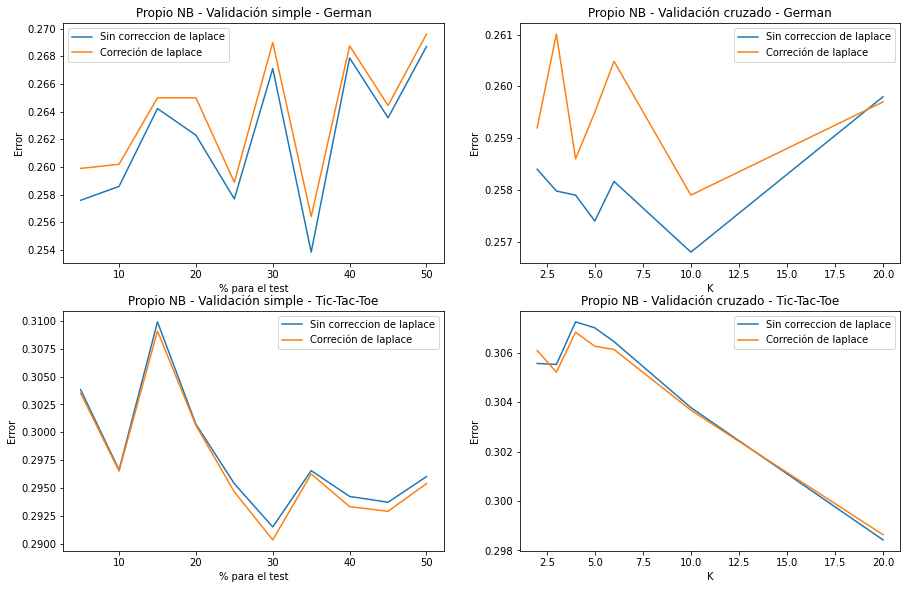

In [3]:
data = [(propioErrorMedioGermanVS, propioErrorMedioGermanVSCLP),
        (propioErrorMedioGermanVC, propioErrorMedioGermanVCCLP),
        (propioErrorMediotttVS, propioErrorMediotttVSCLP),
       (propioErrorMediotttVC, propioErrorMediotttVCCLP)]
titulos = ["Propio NB - Validación simple - German",
           "Propio NB - Validación cruzado - German",
           "Propio NB - Validación simple - Tic-Tac-Toe",
           "Propio NB - Validación cruzado - Tic-Tac-Toe"]

u.plot(data, titulos)

### Efectos de la correción de laplace
En los gráficos podemos ver que el error de la correción de laplace es muy pareja con el error sin la correción de laplace. En el dataset _Tic-Tac-Toe_ se puede ver que el la correción reduce el error para ambos tipos de validación, cruzada y simple, pero en el dataset _German_ el valor del error con la correción está por encima. La razón de esto puede ser que en el dataset del _Tic-Tac-Toe_ solo hay atributos discretos mientras que en el dataset _German_ hay varios atributos continuos en los que no se puede aplicar la corrección.

Podemos concluir pues, que la __corrección de laplace es más efectiva en datasets con una presencia alta de atributos discretos__.

### Evolución del error en la validación simple
Dependiendo del dataset, a medida que aumenta el % destinado al test podemos ver que el error disminuye (en el caso del dataset _Tic-Tac-Toe_) y aumenta (en el caso del dataset _German_). El promedio de ambas validaciones se encuentra en el rango de __~20%-40%__, si se destina ese porcentaje al test se puede ver que los valores del error se aproximan al promedio.


### Evolución del error en la validación cruzada
Al igual que en la validación simple, la tendencia del error con el dataset _Tic-Tac-Toe_ es bajista, mientras que la tendencia con el dataset _German_ es alcista. A mayor K, menor o mayor error dependiendo del dataset.

### German VS Tic-Tac-Toe - Error
En ambos datasets el error es similar, entre el __25%-27%__ para el datset _German_ y __31%-29%__ con el dataset _Tic-Tac-Toe_, independientemente del tipo de validación a usar.

La razón por la que con el dataset _Tic-Tac-Toe_ el error desciende y con el dataset _German_ el valor asciende puede deberse a que en el dataset _German_ cada atributo tiene muchos valores posibles y hay atributos continuos, por lo que cuantos más datos usemos para entrenar más preciso será nuestro modelo.

### Propio Naive Bayes, comportamiento general
El modelo ha demostrado un comportamiento uniforme para los diferentes datasets y tipos de validaciones. El error para el dataset _Tic-Tac-Toe_ es del __30%__ mientras que el error para el dataset _German_ es del __26%__. La única pega es el tiempo de ejecución.

# 2. Scikit-Learn
## 2.1 Tests
A continuación se mostrará el resultado de los tests sobre los distintos tipos de modelos de __Naive Bayes__ que hay implementados en _SKLEARN_. Lo que se se hace en los tests es simplemente entrenar los diferentes modelos para después predecir y mostrar el error de dicha predicción. Esto se hará mediante el particionado simple implementado por sklearn usando la función ___train_test_split___, y el particionado cruzado mediante la función ___cross_val_score___.


### 2.1.1 MultinomialNB

In [4]:
MNBerrorMedioGermanVS, MNBerrorMedioGermanVSCLP, MNBerrorMedioGermanVC,\
MNBerrorMedioGermanVCCLP, MNBerrorMediotttVS, MNBerrorMediotttVSCLP,\
MNBerrorMediotttVC, MNBerrorMediotttVCCLP = u.multinomial_test(german, ttt)

Test 5% / K = 20		German - Media	German - std	Tic-Tac-Toe - Media	Tic-Tac-Toe - std
Validacion cruzada		0.361000	0.068257	0.342376		0.009842
Validacion cruzada (Laplace)	0.361000	0.068257	0.342376		0.009842
Validacion simple		0.346000	0.052192	0.331250		0.069378
Validacion simple (Laplace)	0.368000	0.056000	0.337500		0.057282


Test 10% / K = 10		German - Media	German - std	Tic-Tac-Toe - Media	Tic-Tac-Toe - std
Validacion cruzada		0.361000	0.059908	0.343421		0.005261
Validacion cruzada (Laplace)	0.361000	0.059908	0.343421		0.005261
Validacion simple		0.339000	0.045266	0.337500		0.039857
Validacion simple (Laplace)	0.388000	0.029597	0.323958		0.040195


Test 15% / K = 6		German - Media	German - std	Tic-Tac-Toe - Media	Tic-Tac-Toe - std
Validacion cruzada		0.361993	0.027692	0.346541		0.010727
Validacion cruzada (Laplace)	0.361993	0.027692	0.346541		0.010727
Validacion simple		0.359333	0.034183	0.363889		0.028498
Validacion simple (Laplace)	0.351333	0.036154	0.349306		0.028809


Test 20% 

### 2.1.2 GaussianNB
No se puede usar la corrección de laplace porque en este modelo se asume seguir una distribución normal en todos y cada uno de los atributos.

In [5]:
GNBerrorMedioGermanVS, GNBerrorMedioGermanVC, GNBerrorMediotttVS, GNBerrorMediotttVC = u.gaussian_test(german, ttt)

Test 5% / K = 20		German - Media	German - std	Tic-Tac-Toe - Media	Tic-Tac-Toe - std
Validacion cruzada		0.267000	0.054507	0.302770		0.074030
Validacion simple		0.268000	0.047497	0.272917		0.077083

Test 10% / K = 10		German - Media	German - std	Tic-Tac-Toe - Media	Tic-Tac-Toe - std
Validacion cruzada		0.266000	0.043174	0.314134		0.033250
Validacion simple		0.247000	0.044733	0.301042		0.052177

Test 15% / K = 6		German - Media	German - std	Tic-Tac-Toe - Media	Tic-Tac-Toe - std
Validacion cruzada		0.265944	0.023810	0.364197		0.069330
Validacion simple		0.270667	0.037142	0.286111		0.041295

Test 20% / K = 5		German - Media	German - std	Tic-Tac-Toe - Media	Tic-Tac-Toe - std
Validacion cruzada		0.268000	0.032650	0.379041		0.109193
Validacion simple		0.277500	0.032958	0.265625		0.029092

Test 25% / K = 4		German - Media	German - std	Tic-Tac-Toe - Media	Tic-Tac-Toe - std
Validacion cruzada		0.266000	0.024249	0.420716		0.103407
Validacion simple		0.270000	0.024216	0.277083		0.023954

Test 30% 

### 2.1.3 CategoricalNB
Cuando se hace _fit_ con un subconjunto de los datos totales, pueden quedar valores de atributos que no se han "visto" durante el training. Es por eso que al ejecutar _predict_, la función devuelve una excepción.
Se recibe un warning cuando se ejecuta la validación cruzada usando el dataset _german_. Esto es debido a que dicho dataset contiene valores continuos con los que el modelo no puede tratar.

Por las anteriores razones se ha decidido omitir los test del conjunto german para la validación cruzada.

https://github.com/scikit-learn/scikit-learn/issues/16028

In [6]:
CNBerrorMedioGermanVS, CNBerrorMedioGermanVSCLP, CNBerrorMediotttVS, CNBerrorMediotttVSCLP = u.categorical_test(german, ttt)

Test 5%			German - Media	German - std	Tic-Tac-Toe - Media	Tic-Tac-Toe - std
Validacion simple		0.138000	0.058275	0.316667		0.070218
Validacion simple (Laplace)	0.152000	0.062097	0.325000		0.047690


Test 10%			German - Media	German - std	Tic-Tac-Toe - Media	Tic-Tac-Toe - std
Validacion simple		0.128000	0.039446	0.279167		0.043401
Validacion simple (Laplace)	0.124000	0.036661	0.306250		0.037034


Test 15%			German - Media	German - std	Tic-Tac-Toe - Media	Tic-Tac-Toe - std
Validacion simple		0.142667	0.023702	0.304861		0.027507
Validacion simple (Laplace)	0.130000	0.021134	0.276389		0.049476


Test 20%			German - Media	German - std	Tic-Tac-Toe - Media	Tic-Tac-Toe - std
Validacion simple		0.119000	0.015620	0.300000		0.030208
Validacion simple (Laplace)	0.129500	0.020180	0.296875		0.040276


Test 25%			German - Media	German - std	Tic-Tac-Toe - Media	Tic-Tac-Toe - std
Validacion simple		0.136000	0.012775	0.302083		0.019654
Validacion simple (Laplace)	0.126000	0.014000	0.294583		0.030735


T

## 2.2 Análisis
### 2.2.1 Multinomial NB

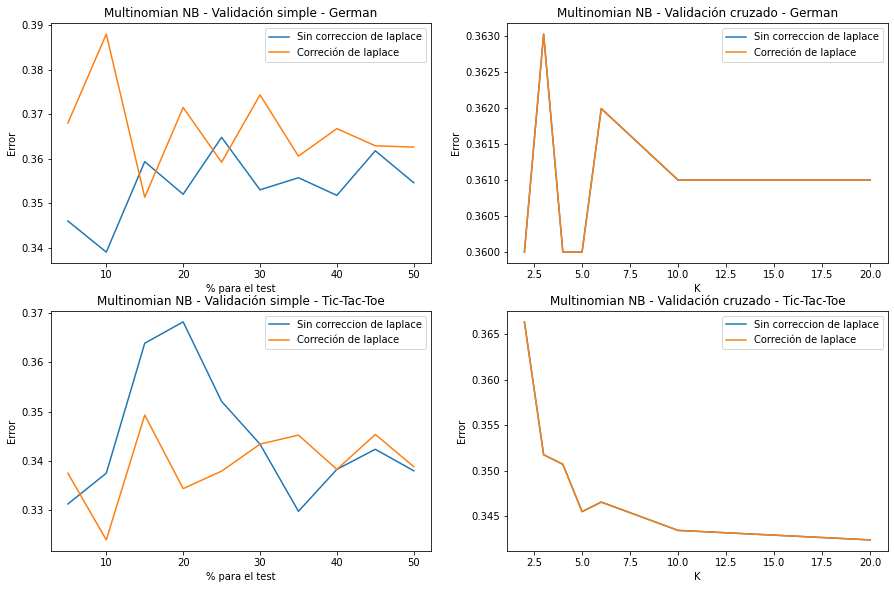

In [7]:
data = [(MNBerrorMedioGermanVS, MNBerrorMedioGermanVSCLP),
        (MNBerrorMedioGermanVC, MNBerrorMedioGermanVCCLP),
        (MNBerrorMediotttVS, MNBerrorMediotttVSCLP),
       (MNBerrorMediotttVC, MNBerrorMediotttVCCLP)]
titulos = ["Multinomian NB - Validación simple - German",
           "Multinomian NB - Validación cruzado - German",
           "Multinomian NB - Validación simple - Tic-Tac-Toe",
           "Multinomian NB - Validación cruzado - Tic-Tac-Toe"]

u.plot(data, titulos)

### Efectos de la correción de laplace

Para el modelo __MultinomialNB__ el aplicar la _corrección de laplace_ no produce ningún tipo de mejora a la hora de clasificar. Esto se puede apreciar en los gráficos, en el particionado simple la diferencia es mínima por lo que no se puede asumir ningún tipo de mejora, en cuanto al particionado cruzado, es aún más exagerado, el error aplicando laplace y sin aplicarlo es el mismo.

### Evolución del error en la validación simple

A medida que vamos aumentando el % destinado test de los datos vemos que esto no implica ninguna mejora. Lo que sí podemos decir es que, cuando se destinua entre un __15%__ y un __40%__  de los datos al test, en ambos datasets el valor de la variación del error se estabiliza en un cierto rango del __2.5%__, entre estos valores el error no varía tanto. Podemos asumir que % adecuado para hacer tests sería __>15%__ y __<40%__.

Hay que recalcar que si se ejecutan tests fuera de estos rangos, el resultado obtenido puede no representar a de forma correcta el modelo.

### Evolución del error en la validación cruzada
A medida que K aumenta podemos ver que el resultado no es tan volátil como cuando K es pequeño, en concreto, cuando __K<5__ la volatilidad del error es mayor (relativamente ya que es un 1% lo que se mueve el resultado).

Se puede concluir que la validación cruzada para __K>5__ presenta resultados más fiables que cuando K es excesivamente pequeño.

Otra cosa es que cuanto menor es K, mayor es el error que devuelve el modelo, la razón de este suceso puede ser que se usen demasiados datos para el test y pocos para el entrenamiento, aunque siendo la variación de un ~2% no es algo que deba preocuparnos.

### German VS Tic-Tac-Toe - Error
En ambos datasets el error es similar, entre un __39%__ y un __31%__, pero, la validación cruzada presenta un error más estable que la validación simple. Independientemente del K que se use, el error durante la validación cruzada varía un 2%, mientras que la validación simple independientemente del % destinado al test el error varía un 6%.

Si comparamos unicamente el error, vemos que este es muy similar en ambos datasets __~35%-36%__.

### MultinomialNB comportamiento general
El modelo ha demostrado un comportamiento uniforme para los diferentes datasets y tipos de validaciones. Aunque el error es pronunciado (~35%), el modelo responde bien ante datasets con atributos discretos y continuos.

Ambas validaciónes presentan un resultado medio muy similar, por lo que se llega a la conclusión que __la validación cruzada es el mejor método de validación__(con respecto a la validación simple).

### 2.2.2 Gaussian NB

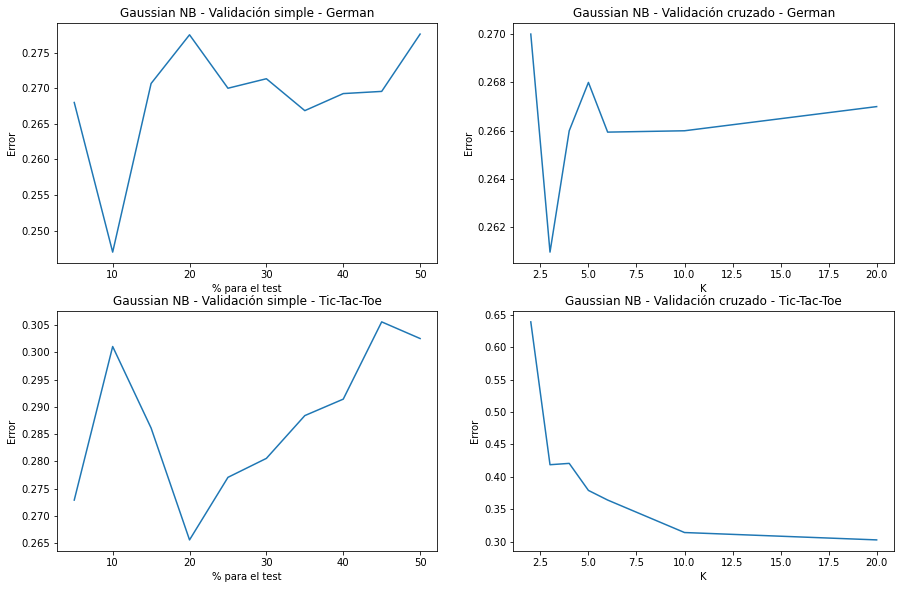

In [8]:
data = [GNBerrorMedioGermanVS,
        GNBerrorMedioGermanVC,
        GNBerrorMediotttVS,
        GNBerrorMediotttVC]
titulos = ["Gaussian NB - Validación simple - German",
           "Gaussian NB - Validación cruzado - German",
           "Gaussian NB - Validación simple - Tic-Tac-Toe",
           "Gaussian NB - Validación cruzado - Tic-Tac-Toe"]

u.plot_gaussian(data, titulos)

### Efectos de la correción de laplace
El modelo __GaussianNB__ asume que la verosimilitud de las variables sigue una distribución normal, por lo que no se puede aplicar la corrección de laplace.

### Evolución del error en la validación Simple
La variación que tiene el error durante este particionado es del __~4%__. Al igual que con el __MultinomialNB__, independientemente del % que se aplique al test, los valores con respecto al error varian bastante. Pero si se puede llegar a la conclusión de que el error está alrededor del __~27%__ en el data set de _German_ y del __~29%__ en el dataset de _Tic-Tac-Toe_.

### Evolución del error en la validación cruzada
La validación cruzada para el dataset _German_ presenta un comportamiento muy uniforme ya que el error tiene un valor alrededor del __~26%__, también se puede ver que para valores donde la __K<6__ es relativamente volátil el valor que obtenemos.

Pero con el dataset del _Tic-Tac-Toe_ ocurre algo peculiar, cuando K<6 los valores del error asiciende hasta el __~60%__. Una de las razones de este comportamiento puede ser que el dataset _Tic-Tac-Toe_ contiene unicamente valores discretos y el __GaussianNB__ normaliza todos los atributos por lo que esta puede ser una razón del error. Otra razón puede ser que asignar una gran porción de los datos al test cuando se trata de modelos que usan atributos con distribuciones normales, puede no ser la mejor idea ya que la _FDP_ (función de densidad de probabilidad) puede que para una fila del test devuelva que la probabilidad una cierta clase es cercana a nula debido a que no ha tenido suficientes datos para crear un modelo preciso.

### German VS Tic-Tac-Toe - Error
Comparando ambos datasets podemos ver que los resultados son bastante similares exceptuando el dataset _Tic-Tac-Toe_ cuando se usa la validación cruzada. Aun así para el dataset _German_ el error en las predicciones tiende al __~27%-29%__ y para el _Tic-Tac-Toe_ la validación simple proporicona un error de __~26%__ mientras que la validación cruzada un __~30%-40%__.

### GaussianNB comportamiento general
Para datasets con valores continuos como puede ser el dataset _German_, el modelo GaussianNB presenta un error tolerable y un comportamiento de los test aceptables, en cambio al usar el dataset _Tic-Tac-Toe_ que tiene atributos puramente discretos el comportamiento no es el mejor sobre todo al usar la validación cruzada con un K<6.

### 2.2.3 Categorical

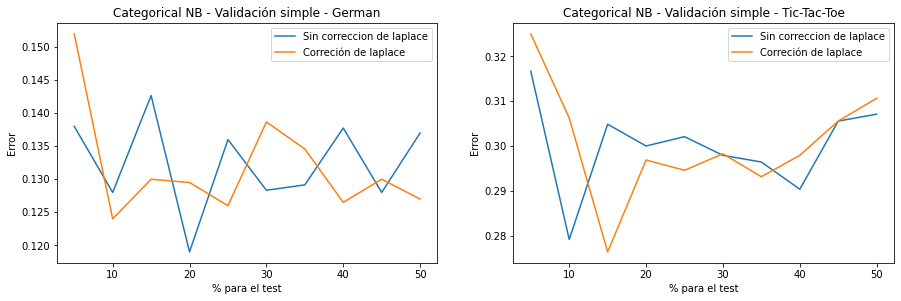

In [9]:
data = [(CNBerrorMedioGermanVS, CNBerrorMedioGermanVSCLP),
        (CNBerrorMediotttVS, CNBerrorMediotttVSCLP)]
titulos = ["Categorical NB - Validación simple - German",
           "Categorical NB - Validación simple - Tic-Tac-Toe"]

u.plot(data, titulos)

### Efectos de la correción de laplace
Al igual que en los modelos anteriores, el modelo __CategoricalNB__ no presenta una diferencia clara al aplicar la correción de laplace.

### Evolución del error en la validación Simple
El error durante la validación simple es muy estable, con la corrección de laplace más de hecho, se pueden ver más picos en los datos sin la correción de laplace. El % de los datos destinados al test, de nuevo, no parece aportar nada a la variación de los datos con ninguno de los 2 datasets.

### German VS Tic-Tac-Toe - Error
El modelo categorical presenta un error muy bajo (__~13%__) con el dataset _German_, mientras que con el dataset _Tic-Tac-Toe_ el error es mayor (__~30%__).

### CategoricalNB comportamiento general
Con el dataset _German_ presenta un error muy pequeño y uniforme, mientras que con el dataset _Tic-Tac-Toe_, la uniformidad se mantiene pero el error es mayor.

### 2.2.4 Multinomial VS Gaussian VS Categorical - German


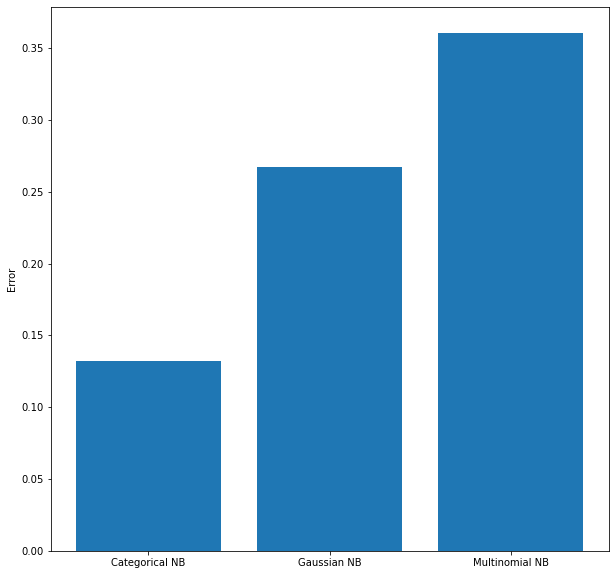

In [10]:
data = [(CNBerrorMedioGermanVS, CNBerrorMedioGermanVSCLP),
        (GNBerrorMedioGermanVS, GNBerrorMedioGermanVC),
        (MNBerrorMedioGermanVS, MNBerrorMedioGermanVSCLP,
         MNBerrorMedioGermanVC, MNBerrorMedioGermanVCCLP)]
titulos = ["Categorical NB", "Gaussian NB", "Multinomial NB"]
        
u.plot_histograms(data, titulos)

Como se puede ver en el histograma anterior, independientemente de si se usa la corrección de laplace o no, el modelo que otorga mejores resultados es el __CategoricalNB__ dando un error inferior al 15%, mientras que el peor es el __MultinomialNB__ dando de media un error del 35%.

### 2.2.5 Multinomial VS Gaussian VS Categorical - Tic-Tac-Toe

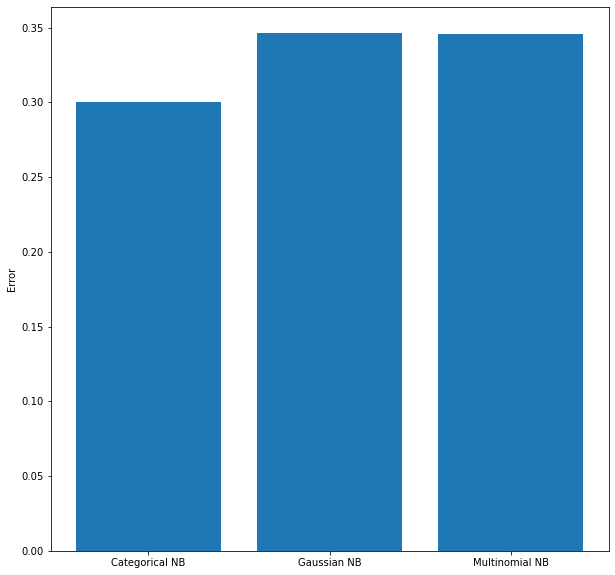

In [11]:
data = [(CNBerrorMediotttVS, CNBerrorMediotttVSCLP),
        (GNBerrorMediotttVS, GNBerrorMediotttVC),
        (MNBerrorMediotttVS, MNBerrorMediotttVSCLP,
         MNBerrorMediotttVC, MNBerrorMediotttVCCLP)]
titulos = ["Categorical NB", "Gaussian NB", "Multinomial NB"]
        
u.plot_histograms(data, titulos)

En cuanto al dataset _Tic-Tac-Toe_ la diferencia entre los modelos no es tan pronunciada. De nuevo, el modelo con el mejor desempeño es el __CategoricalNB__ mientras que los otros dos se encuentran muy parejos.

El hecho de que el modelo __CategoricalNB__ sea el mejor en ambos datasets puede tener que ver con que dichos datasets tienen una alta presencia de atributos discretos.

### 2.2.6 Conclusión
__CategoricalNB__ es el que presenta un mayor desempeño clasificando debido a que la mayoría de atributos a clasificar son discretos.

Luego, la validación que presenta uniformes y mejores resultados es la __validación cruzada__.

Con respecto a la _correción de laplace_ se ha visto que __no afecta en gran medida a la decisión__ de los diferentes modelos debido a los datasets. Siendo datasets donde tenemos todos los datos y con un tamaño suficiente, es innecesario aplicar la _corrección de laplace_, en cambio, si los datasets fuesen reducidos, hubiese filas donde algunos atributos no continenen datos, etc. la correción de laplace resultaría muy util.

## 2.3 One-Hot Encoding y MultinomialNB

In [12]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

df_german = pd.read_csv("ConjuntosDatos/german.data")
germanOneHot = enc.fit_transform(df_german).toarray()

df_ttt = pd.read_csv("ConjuntosDatos/tic-tac-toe.data")
tttOneHot = enc.fit_transform(df_ttt).toarray()

Al comprobar el número de columnas de los diferentes datasets después de aplicar el One-Hot encoder vemos que el número de columnas aumenta. Es curioso ver como para el dataset _German_ el aumento es enorme.

In [13]:
print("Columnas German tras One-Hot Encoder:", germanOneHot.shape[1], "| Antes:", german.datos.shape[1])
print("Columnas Tic-Tac-Toe tras One-Hot Encoder:", tttOneHot.shape[1], "| Antes:", ttt.datos.shape[1])

Columnas German tras One-Hot Encoder: 1077 | Antes: 21
Columnas Tic-Tac-Toe tras One-Hot Encoder: 29 | Antes: 10


In [14]:
onehotMNBerrorMedioGermanVS, onehotMNBerrorMedioGermanVSCLP, onehotMNBerrorMedioGermanVC,\
onehotMNBerrorMedioGermanVCCLP, onehotMNBerrorMediotttVS, onehotMNBerrorMediotttVSCLP,\
onehotMNBerrorMediotttVC, onehotMNBerrorMediotttVCCLP = u.onehot_multinomial_test(germanOneHot, tttOneHot)

Test 5% / K = 20		German - Media	German - std	Tic-Tac-Toe - Media	Tic-Tac-Toe - std
Validacion cruzada		0.137000	0.035930	0.012500		0.021246
Validacion cruzada (Laplace)	0.137000	0.035930	0.012500		0.021246
Validacion simple		0.136000	0.048000	0.008333		0.013819
Validacion simple (Laplace)	0.132000	0.057411	0.012500		0.021246


Test 10% / K = 10		German - Media	German - std	Tic-Tac-Toe - Media	Tic-Tac-Toe - std
Validacion cruzada		0.142000	0.024000	0.015625		0.019901
Validacion cruzada (Laplace)	0.142000	0.024000	0.015625		0.019901
Validacion simple		0.132000	0.017776	0.009375		0.008653
Validacion simple (Laplace)	0.133000	0.042907	0.006250		0.005103


Test 15% / K = 6		German - Media	German - std	Tic-Tac-Toe - Media	Tic-Tac-Toe - std
Validacion cruzada		0.150987	0.009208	0.023978		0.016693
Validacion cruzada (Laplace)	0.150987	0.009208	0.023978		0.016693
Validacion simple		0.136667	0.028324	0.008333		0.005197
Validacion simple (Laplace)	0.156000	0.030288	0.009028		0.004447


Test 20% 

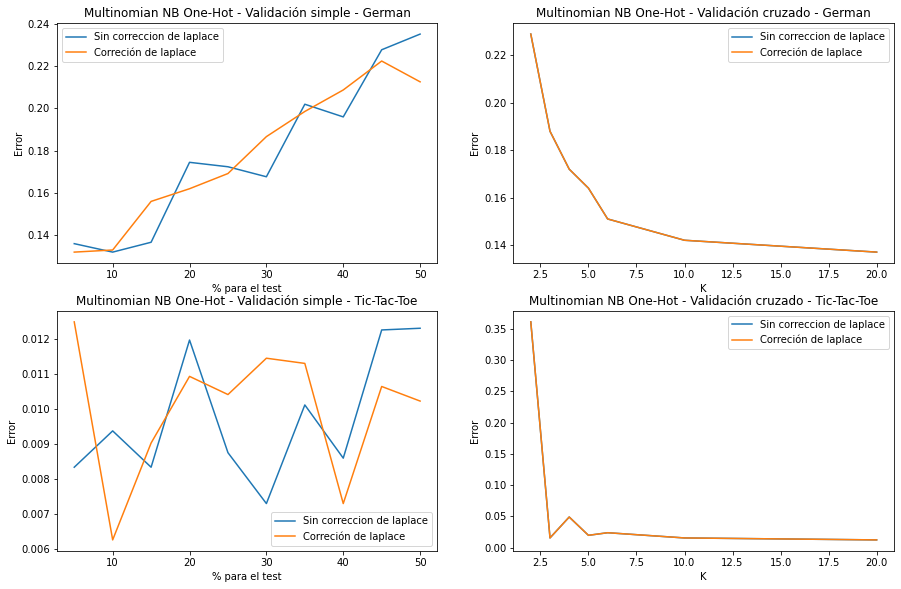

In [15]:
data = [(onehotMNBerrorMedioGermanVS, onehotMNBerrorMedioGermanVSCLP),
        (onehotMNBerrorMedioGermanVC, onehotMNBerrorMedioGermanVCCLP),
        (onehotMNBerrorMediotttVS, onehotMNBerrorMediotttVSCLP),
       (onehotMNBerrorMediotttVC, onehotMNBerrorMediotttVCCLP)]
titulos = ["Multinomian NB One-Hot - Validación simple - German",
           "Multinomian NB One-Hot - Validación cruzado - German",
           "Multinomian NB One-Hot - Validación simple - Tic-Tac-Toe",
           "Multinomian NB One-Hot - Validación cruzado - Tic-Tac-Toe"]

u.plot(data, titulos)

Al aplicar One-Hot encoding vemos que el error disminuye drásticamente en comparación a cuando se hicieron los tests sin el One-Hot encoding.

El comportamiento con respecto a la _corrección de laplace_ y la _evolución del error_ es el mismo que antes.

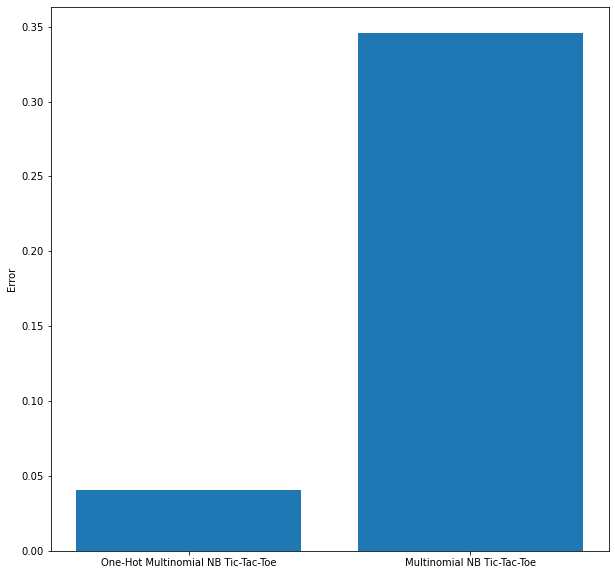

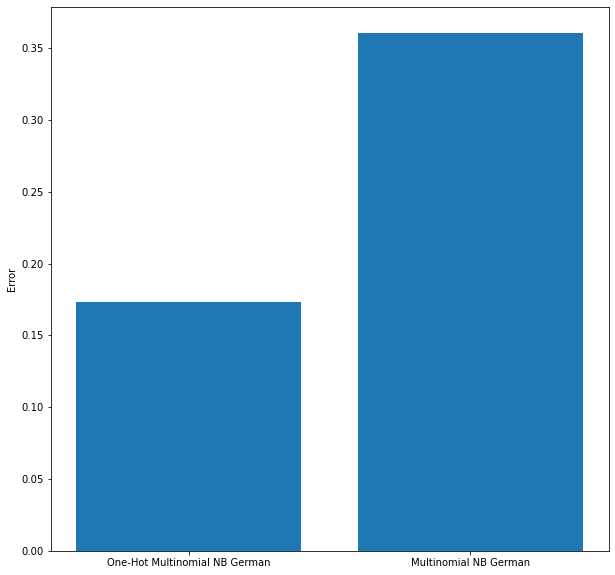

In [16]:
data = [(onehotMNBerrorMediotttVS, onehotMNBerrorMediotttVSCLP,
         onehotMNBerrorMediotttVC, onehotMNBerrorMediotttVCCLP),
        (MNBerrorMediotttVS, MNBerrorMediotttVSCLP,
         MNBerrorMediotttVC, MNBerrorMediotttVCCLP)]
titulos = ["One-Hot Multinomial NB Tic-Tac-Toe", "Multinomial NB Tic-Tac-Toe"]
u.plot_histograms(data, titulos)

data = [(onehotMNBerrorMedioGermanVS, onehotMNBerrorMedioGermanVSCLP,
         onehotMNBerrorMedioGermanVC, onehotMNBerrorMedioGermanVCCLP),
        (MNBerrorMedioGermanVS, MNBerrorMedioGermanVSCLP,
         MNBerrorMedioGermanVC, MNBerrorMedioGermanVCCLP)]
titulos = ["One-Hot Multinomial NB German", "Multinomial NB German"]
u.plot_histograms(data, titulos)

En estos histogramas, se puede ver como el promedio del error del MultinomialNB usando One-Hot encoding con respecto a no usarlo, es inferior.

Asumimos pues que usar One-Hot Encoding en datasets donde haya atributos discretos __es bastante útil y recomendable__.

# 3. Analísis de todos los modelos
## 3.1 German


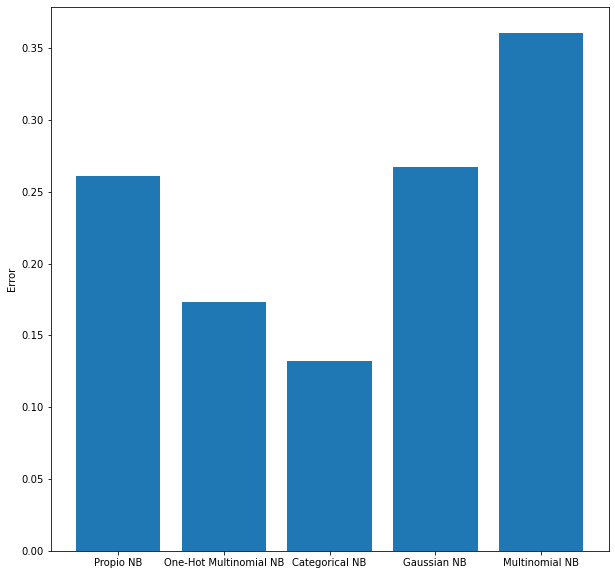

In [17]:
data = [(propioErrorMedioGermanVS, propioErrorMedioGermanVSCLP,
         propioErrorMedioGermanVC, propioErrorMedioGermanVCCLP),
        (onehotMNBerrorMedioGermanVS, onehotMNBerrorMedioGermanVSCLP,
         onehotMNBerrorMedioGermanVC, onehotMNBerrorMedioGermanVCCLP),
        (CNBerrorMedioGermanVS, CNBerrorMedioGermanVSCLP),
        (GNBerrorMedioGermanVS, GNBerrorMedioGermanVC),
        (MNBerrorMedioGermanVS, MNBerrorMedioGermanVSCLP,
         MNBerrorMedioGermanVC, MNBerrorMedioGermanVCCLP)]
titulos = ["Propio NB", "One-Hot Multinomial NB", "Categorical NB", "Gaussian NB", "Multinomial NB"]
        
u.plot_histograms(data, titulos)

El modelo que tiene un mejor desempeño es el __Categorical NB__, mientras que el modelo propio se encuentra muy cerca del _GaussianNB_ situandose en 3ª posición.


## 3.2 Tic-Tac-Toe

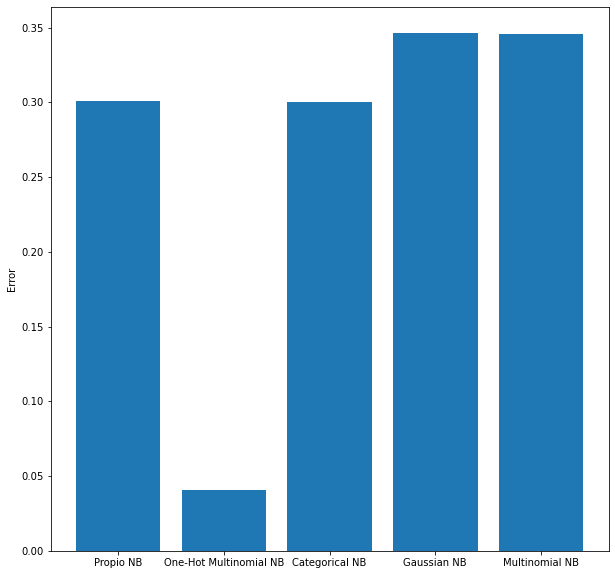

In [18]:
data = [(propioErrorMediotttVS, propioErrorMediotttVSCLP,
         propioErrorMediotttVC, propioErrorMediotttVCCLP),
        (onehotMNBerrorMediotttVS, onehotMNBerrorMediotttVSCLP,
         onehotMNBerrorMediotttVC, onehotMNBerrorMediotttVCCLP),
        (CNBerrorMediotttVS, CNBerrorMediotttVSCLP),
        (GNBerrorMediotttVS, GNBerrorMediotttVC),
        (MNBerrorMediotttVS, MNBerrorMediotttVSCLP,
         MNBerrorMediotttVC, MNBerrorMediotttVCCLP)]
titulos = ["Propio NB", "One-Hot Multinomial NB", "Categorical NB", "Gaussian NB", "Multinomial NB"]
        
u.plot_histograms(data, titulos)

El modelo que tiene un mejor desempeño es el __MultinomialNB usando el One-Hot encoding__, pero el modelo propio en comparación con los demás no tiene un mal desempeño, se sitúa en 2ª posición pero el error está en torno al __~30%__, el cual es un error aceptable.

## 3.3 Conclusión
En general podemos decir que nuestro modelo es mejor que el _GaussianNB_ y el _MultinomialNB (sin One-Hot encoding)_ con respecto al error. En cuanto al tiempo de ejecución al modelo propio le quedan muchas optimizaciones para estar al nivel de los otros modelos.